In [6]:
import pandas as pd
import numpy  as np


In [7]:
df = pd.read_csv('AB_NYC_2019.txt')

In [5]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
%matplotlib inline

<AxesSubplot:xlabel='price', ylabel='Count'>

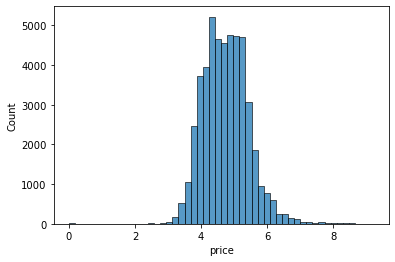

In [12]:
sns.histplot(np.log1p(df.price), bins=50)


In [14]:
df = df[['latitude',
'longitude',
'price',
'minimum_nights',
'number_of_reviews',
'reviews_per_month',
'calculated_host_listings_count',
'availability_365']]

In [15]:
df.isnull().sum()

latitude                              0
longitude                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [16]:
df.minimum_nights.median()

3.0

In [17]:
n = len(df)
n

48895

In [18]:
idx = np.arange(n)
idx

array([    0,     1,     2, ..., 48892, 48893, 48894])

In [19]:
np.random.seed(42)
np.random.shuffle(idx)

In [20]:
df = df.iloc[idx].reset_index(drop=True)

In [21]:
df

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.64354,-73.97777,89,3,62,0.71,1,189
1,40.70666,-73.90779,30,21,0,NaN,1,73
2,40.76116,-73.99016,120,2,17,0.43,1,0
3,40.70763,-74.01050,470,2,5,1.88,327,272
4,40.79658,-73.93287,199,2,30,0.80,1,30
...,...,...,...,...,...,...,...,...
48890,40.84650,-73.94319,60,1,0,NaN,1,0
48891,40.73957,-74.00082,85,2,4,1.90,1,76
48892,40.78318,-73.97372,130,30,1,0.34,5,261
48893,40.77508,-73.97990,150,2,11,0.13,1,2


In [22]:
n_val = int(len(df)*0.2)
n_test = int(len(df)*0.2)
n_train = len(df) - n_val - n_test


In [23]:
n_train, n_val, n_test

(29337, 9779, 9779)

In [24]:
df_train = df.iloc[:n_train]
df_val = df.iloc[n_train:n_train+n_val]
df_test = df.iloc[-n_test:]

In [25]:
print(len(df_train), len(df_val), len(df_test))

29337 9779 9779


In [26]:
y_train = np.log1p(df_train.price.values)
y_val = np.log1p(df_val.price.values)
y_test = np.log1p(df_test.price.values)

In [27]:
del df_train['price']
del df_val['price']
del df_test['price']

In [79]:
df_train.columns

Index(['latitude', 'longitude', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [80]:
df_train.columns.size


7

In [28]:
y_train

array([4.49980967, 3.4339872 , 4.79579055, ..., 4.61512052, 4.2341065 ,
       3.8286414 ])

In [32]:
df_train_nazero = df_train.fillna(0)

In [33]:
df_train_nazero.isnull().sum()

latitude                          0
longitude                         0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [35]:
X_train_nazero = np.array(df_train_nazero)
X_train_nazero

array([[ 4.064354e+01, -7.397777e+01,  3.000000e+00, ...,  7.100000e-01,
         1.000000e+00,  1.890000e+02],
       [ 4.070666e+01, -7.390779e+01,  2.100000e+01, ...,  0.000000e+00,
         1.000000e+00,  7.300000e+01],
       [ 4.076116e+01, -7.399016e+01,  2.000000e+00, ...,  4.300000e-01,
         1.000000e+00,  0.000000e+00],
       ...,
       [ 4.072716e+01, -7.398524e+01,  3.000000e+00, ...,  3.120000e+00,
         1.000000e+00,  6.000000e+01],
       [ 4.079578e+01, -7.394523e+01,  2.000000e+00, ...,  2.100000e+00,
         1.000000e+00,  2.650000e+02],
       [ 4.069671e+01, -7.394896e+01,  1.000000e+00, ...,  5.000000e-02,
         1.000000e+00,  0.000000e+00]])

In [41]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [42]:
train_linear_regression(X_train_nazero,y_train)
y_pred

(-419.9126568379371,
 array([ 1.30676225e+00, -5.02167853e+00, -5.59803107e-04, -4.07634895e-04,
        -8.25470076e-03,  1.33371320e-03,  6.50203890e-04]))

In [44]:
df_train_means = df_train.fillna(df_train.reviews_per_month.mean())
X_train_means = np.array(df_train_means)
X_train_means

array([[ 4.06435400e+01, -7.39777700e+01,  3.00000000e+00, ...,
         7.10000000e-01,  1.00000000e+00,  1.89000000e+02],
       [ 4.07066600e+01, -7.39077900e+01,  2.10000000e+01, ...,
         1.36854921e+00,  1.00000000e+00,  7.30000000e+01],
       [ 4.07611600e+01, -7.39901600e+01,  2.00000000e+00, ...,
         4.30000000e-01,  1.00000000e+00,  0.00000000e+00],
       ...,
       [ 4.07271600e+01, -7.39852400e+01,  3.00000000e+00, ...,
         3.12000000e+00,  1.00000000e+00,  6.00000000e+01],
       [ 4.07957800e+01, -7.39452300e+01,  2.00000000e+00, ...,
         2.10000000e+00,  1.00000000e+00,  2.65000000e+02],
       [ 4.06967100e+01, -7.39489600e+01,  1.00000000e+00, ...,
         5.00000000e-02,  1.00000000e+00,  0.00000000e+00]])

In [49]:
w = train_linear_regression(X_train_means,y_train)

In [55]:
w_zero = train_linear_regression(X_train_nazero,y_train)

In [53]:
y_pred_means = w[0] + X_train_means.dot(w[1])

In [54]:
y_pred_means

array([4.76589611, 4.45581848, 4.89107725, ..., 4.83526871, 4.87768975,
       4.60682893])

In [56]:
y_pred_nazero = w_zero[0] + X_train_nazero.dot(w_zero[1])

<AxesSubplot:ylabel='Count'>

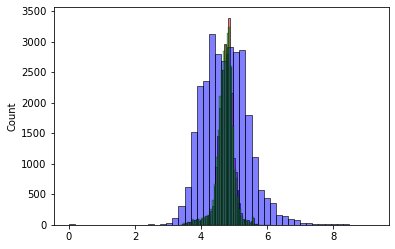

In [57]:
sns.histplot(y_pred_means, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)
sns.histplot(y_pred_nazero, color='green', alpha=0.5, bins=50)

In [58]:
w0 = 0


In [59]:
w0, w = train_linear_regression(X_train_means,y_train)

In [60]:
w0

-423.53930637946286

In [61]:
w

array([ 1.31148321e+00, -5.06799069e+00, -4.87741550e-04, -6.63849279e-04,
        5.34563264e-03,  1.32706020e-03,  6.38794181e-04])